In [1]:
!pip install ucimlrepo

In [2]:
!pip install numpy==1.26.4 --force-reinstall

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 80.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
jaxlib 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
jax 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
pytensor 2.35.1 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
thin

In [1]:
!python -m pip install scikit-learn-extra

  Using cached scikit-learn-extra-0.3.0.tar.gz (818 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-learn-extra: filename=scikit_learn_extra-0.3.0-cp312-cp312-linux_x86_64.whl size=2178124 sha256=ada98bd521ca256a9bf38d4994cb8cade668224f8ac2348dc06624294b92beae
  Stored in directory: /root/.cache/pip/wheels/17/4d/c3/c6d5d563c1bf8146d059d63be3678abc2f2801fba0aaf5f0b8
Successfully built scikit-learn-extra


In [1]:
!rm -r plots
!mkdir plots

In [3]:
# import packages
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN, OPTICS, AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from hdbscan.validity import validity_index
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import BisectingKMeans
from sklearn.metrics import (rand_score, adjusted_rand_score,
                             mutual_info_score, adjusted_mutual_info_score, normalized_mutual_info_score,
                             silhouette_score, calinski_harabasz_score, davies_bouldin_score)
import numpy as np
import os
import matplotlib.image as mpimg

In [4]:
def get_dataset(dataset_name):
  df= None
  if dataset_name=='iris':
    iris= fetch_ucirepo(id=53)
    X=iris.data.features
    y=iris.data.targets

    df= pd.concat([X, y], axis=1)

  elif dataset_name=='wine':
    wine= fetch_ucirepo(id=109)
    X=wine.data.features
    y=wine.data.targets

    df= pd.concat([X, y], axis=1)

  else:
    print("Dataset not found")


  return df

In [5]:
iris_dataset= get_dataset('iris')
iris_dataset.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
unique_classes = iris_dataset['class'].unique()
class_mapping = {class_name: i+1 for i, class_name in enumerate(unique_classes)}
iris_dataset['class'] = iris_dataset['class'].map(class_mapping)

iris_dataset.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [7]:
iris_dataset['class'].unique()

array([1, 2, 3])

In [8]:
iris_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [9]:
iris_dataset.isnull().sum()

,0
sepal length,0
sepal width,0
petal length,0
petal width,0
class,0


In [10]:
wine_dataset= get_dataset('wine')
wine_dataset.head()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [11]:
wine_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malicacid                     178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity_of_ash             178 non-null    float64
 4   Magnesium                     178 non-null    int64  
 5   Total_phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid_phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color_intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  0D280_0D315_of_diluted_wines  178 non-null    float64
 12  Proline                       178 non-null    int64  
 13  class

In [12]:
wine_dataset.isnull().sum()

,0
Alcohol,0
Malicacid,0
Ash,0
Alcalinity_of_ash,0
Magnesium,0
Total_phenols,0
Flavanoids,0
Nonflavanoid_phenols,0
Proanthocyanins,0
Color_intensity,0


In [13]:
wine_dataset['class'].unique()

array([1, 2, 3])

In [14]:
def apply_scaling(df):
  scaler= StandardScaler()
  y= df["class"]
  x= df.drop(['class'], axis=1)

  x_scaled= scaler.fit_transform(x)

  return x_scaled, y

In [15]:
def k_means_clustering(x_scaled,y_true, n_clusters_range):
    best_k = 1
    predict_score = float('-inf')
    best_labels = None

    for k in np.arange(2, n_clusters_range+1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto', init='random')
        labels= kmeans.fit_predict(x_scaled)
        score= rand_score(y_true, labels)
        if score>predict_score:
            predict_score= score
            best_k = k


    print(f"K-Means: Found best Rand score: ({predict_score:.4f}) within the range. Returning labels for k={best_k}.")
    return best_k

In [16]:

def dbcv_score(X, labels, metric='euclidean'):

    labels = np.array(labels)
    mask = labels != -1
    if np.sum(mask) == 0 or len(np.unique(labels[mask])) < 2:
        return np.nan

    X_filtered = X[mask]
    labels_filtered = labels[mask]
    try:
        score = validity_index(X_filtered, labels_filtered, metric=metric)
    except Exception:
        score = np.nan
    return score

In [17]:
def dbscan_clustering(x_scaled, y_true, eps_range, min_samples_range):
    best_score = float('-inf')
    best_eps = None
    best_min_samples = None
    best_labels = None

    for eps in np.arange(0.1, eps_range, 0.1):
        for min_samples in np.arange(2, min_samples_range + 1):
            dbscan = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=-1)
            labels = dbscan.fit_predict(x_scaled)

            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

            if n_clusters == 3:
                score = rand_score(y_true, labels)
                if score > best_score:
                    best_score = score
                    best_labels = labels
                    best_eps = eps
                    best_min_samples = min_samples

    if best_labels is not None:
        print(f"DBSCAN: Best Rand score: ({best_score:.4f}) found with eps={best_eps:.2f} and min_samples={best_min_samples}.")
        return best_eps, best_min_samples
    else:
        print("DBSCAN: Could not find a clustering with exactly 3 clusters for the given parameter ranges.")
        return None, None

In [18]:

def optics_clustering(x_scaled, y_true, eps_range, min_samples_range):
    best_score = float('-inf')
    best_min_samples = None
    best_eps = None
    best_labels = None

    for eps in np.arange(0.1, eps_range, 0.1):
        for min_samples in np.arange(2, min_samples_range + 1):
            optics = OPTICS(eps=eps, min_samples=min_samples, n_jobs=-1)
            labels = optics.fit_predict(x_scaled)

            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

            if n_clusters == 3:
                score = rand_score(y_true, labels)
                if score > best_score:
                    best_score = score
                    best_labels = labels
                    best_min_samples = min_samples
                    best_eps = eps

    if best_labels is not None:
        print(f"OPTICS: Best Rand score: ({best_score:.4f}) found with eps={best_eps:.2f} and min_samples={best_min_samples}.")
        return best_eps, best_min_samples
    else:
        print("OPTICS: Could not find a clustering with exactly 3 clusters for the given parameter ranges.")
        return None, None

In [19]:
def plot_dendrogram(linked, title, dataset_name):
    plt.figure(figsize=(10, 7))
    dendrogram(linked,
               orientation='top',
               labels=None,
               distance_sort='decreasing',
               show_leaf_counts=True)
    plt.title(f'Dendrogram for {title}')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.savefig(f'plots/{dataset_name}_{title}_dendrogram.png')
    plt.close()

In [20]:

def kmedoids_clustering(x_scaled,y_true, n_clusters_range):
    best_score = -1
    best_labels = None
    best_n_clusters = None


    for n_clusters in np.arange(2, n_clusters_range+1):
        if n_clusters > 1 and n_clusters <= len(x_scaled):
            kmedoids = KMedoids(n_clusters=n_clusters, random_state=42)
            labels = kmedoids.fit_predict(x_scaled)

            if len(set(labels)) > 1:
                score= rand_score(y_true, labels)
                if score > best_score:
                    best_score = score
                    best_labels = labels
                    best_n_clusters = n_clusters

    if best_labels is not None:
        print(f"K-Medoids: Best Rand Score ({best_score:.4f}) found with {best_n_clusters} clusters.")
        return best_n_clusters
    else:
        print("K-Medoids: Could not find a valid clustering within the given cluster range.")
        return None

In [21]:


def kmeans_plus_plus_clustering(x_scaled,y_true, n_clusters_range):
    best_score = -1
    best_labels = None
    best_n_clusters = None


    for n_clusters in np.arange(2, n_clusters_range + 1):
        if n_clusters > 1 and n_clusters <= len(x_scaled):
            kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42, n_init='auto')
            labels = kmeans.fit_predict(x_scaled)

            if len(set(labels)) > 1:
                score= rand_score(y_true, labels)
                if score > best_score:
                    best_score = score
                    best_labels = labels
                    best_n_clusters = n_clusters


    if best_n_clusters is not None:
        print(f"K-Means++: Best Rand Score ({best_score:.4f}) found with {best_n_clusters} clusters.")
        return best_n_clusters
    else:
        print("K-Means++: Could not find a valid clustering within the given cluster range.")
        return None

In [22]:


def bisecting_kmeans_clustering(x_scaled,y_true, n_clusters_range):
    best_score = -1
    best_labels = None
    best_n_clusters = None


    for n_clusters in np.arange(2, n_clusters_range + 1):
        if n_clusters > 1 and n_clusters <= len(x_scaled):
            bisecting_kmeans = BisectingKMeans(n_clusters=n_clusters, random_state=42)
            labels = bisecting_kmeans.fit_predict(x_scaled)

            if len(set(labels)) > 1:
                score = silhouette_score(x_scaled, labels)

                if score > best_score:
                    best_score = score
                    best_labels = labels
                    best_n_clusters = n_clusters

    if best_labels is not None:
        print(f"Bisecting K-Means: Best Silhouette Score ({best_score:.4f}) found with {best_n_clusters} clusters.")
        return best_n_clusters
    else:
        print("Bisecting K-Means: Could not find a valid clustering within the given cluster range.")
        return None

In [23]:
def agglomerative_clustering(x_scaled,y_true, n_clusters_range):

  best_score= -1
  best_cluster= None

  for cluster in np.arange(2, n_clusters_range+1):

    model= AgglomerativeClustering(n_clusters= cluster, linkage='ward')
    labels= model.fit_predict(x_scaled)

    if len(set(labels))<2:
      continue

    try:
      score= rand_score(y_true, labels)
    except Exception:
      score= np.nan

    if not np.isnan(score) and score>best_score:
      best_score= score
      best_cluster= cluster

  if best_cluster is not None:
    print(f"Agglomerative Clustering: Best Rand Score ({best_score:.4f}) found with {best_cluster}")
    return best_cluster
  else:
    return None

In [24]:


def evaluate_clustering(model_name, dataset_name, n_clusters, eps, min_sample, X_scaled, true_labels, predicted_labels):

    metrics = {}
    metrics["dataset_name"]= dataset_name
    metrics['model_name']= model_name
    metrics["n_clusters"]= n_clusters if n_clusters is not None else "NA"
    metrics["eps"]= eps if eps is not None else "NA"
    metrics["min_sample"]= min_sample if min_sample is not None else "NA"
    n_samples = X_scaled.shape[0]
    n_predicted_clusters = len(set(predicted_labels)) - (1 if -1 in predicted_labels else 0)

    if true_labels is not None:
        metrics['Rand Score'] = rand_score(true_labels, predicted_labels)
        metrics['Adjusted Rand Score'] = adjusted_rand_score(true_labels, predicted_labels)
        metrics['Mutual Info Score'] = mutual_info_score(true_labels, predicted_labels)
        metrics['Adjusted Mutual Info Score'] = adjusted_mutual_info_score(true_labels, predicted_labels)
        metrics['Normalized Mutual Info Score'] = normalized_mutual_info_score(true_labels, predicted_labels)

    if n_predicted_clusters > 1 and n_samples > 1:
        metrics['Silhouette Coefficient'] = silhouette_score(X_scaled, predicted_labels)
        metrics['Calinski-Harabasz Index'] = calinski_harabasz_score(X_scaled, predicted_labels)
        metrics['Davies-Bouldin Index'] = davies_bouldin_score(X_scaled, predicted_labels)
    else:
        metrics['Silhouette Coefficient'] = None
        metrics['Calinski-Harabasz Index'] = None
        metrics['Davies-Bouldin Index'] = None



    sse = 0
    unique_predicted_labels = np.unique(predicted_labels)
    for label in unique_predicted_labels:
        if label != -1:
            cluster_points = X_scaled[predicted_labels == label]
            if len(cluster_points) > 0:
                cluster_center = np.mean(cluster_points, axis=0)
                sse += np.sum((cluster_points - cluster_center) ** 2)
    metrics['Cohesion'] = sse


    mean_all_data = np.mean(X_scaled, axis=0)
    tss = np.sum((X_scaled - mean_all_data) ** 2)
    ssb = tss - sse
    metrics['Separation'] = ssb


    return metrics

In [25]:
def run_experiment(dataset_name, dataframe):


  x_scaled, y_true= apply_scaling(dataframe)
  pca= PCA(n_components=2)
  x_scaled= pca.fit_transform(x_scaled)

  results= []
  models= {
      "Kmeans": k_means_clustering,
      "DBSCAN": dbscan_clustering,
      "OPTICS": optics_clustering,
      "Dendrogram": agglomerative_clustering,
      "Kmedoids": kmedoids_clustering,
      "Kmeans++": kmeans_plus_plus_clustering,
      "Bisecting K-Means": bisecting_kmeans_clustering
  }

  for model_name in models:
    n_clusters, eps, min_samples, model= None, None, None, None
    if model_name in ["Kmeans", "Kmedoids", "Kmeans++", "Bisecting K-Means"]:
      n_clusters= models[model_name](x_scaled,y_true, n_clusters_range=15)

      if n_clusters is None:
          print(f"Skipping {model_name} for {dataset_name} due to no valid clustering.")
          continue

      if model_name=='Kmeans':
        model= KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
      elif model_name=='Kmedoids':
        model= KMedoids(n_clusters=n_clusters, random_state=42)
      elif model_name=='Kmeans++':
        model= KMeans(n_clusters=n_clusters, init='k-means++', random_state=42, n_init='auto')
      elif model_name=='Bisecting K-Means':
        model= BisectingKMeans(n_clusters=n_clusters, random_state=42)

    elif model_name=="DBSCAN":

      eps, min_samples= models[model_name](x_scaled,y_true, eps_range=3, min_samples_range=20)

      if eps is None or min_samples is None:
          print(f"Skipping {model_name} for {dataset_name} due to no valid clustering.")
          continue

      model= DBSCAN(eps=eps, min_samples=min_samples, n_jobs= -1)

    elif model_name=="OPTICS":

      eps, min_samples= models[model_name](x_scaled,y_true, eps_range= 3, min_samples_range=20)

      if eps is None or min_samples is None:
          print(f"Skipping {model_name} for {dataset_name} due to no valid clustering.")
          continue

      model= OPTICS(eps= eps, min_samples=min_samples, n_jobs= -1)

    elif model_name=='Dendrogram':

      linked = linkage(x_scaled, 'ward')
      plot_dendrogram(linked, model_name, dataset_name)


      n_clusters= agglomerative_clustering(x_scaled, y_true, n_clusters_range=15)
      if n_clusters is not None:
        model = AgglomerativeClustering(n_clusters=n_clusters)




    predicted_labels= model.fit_predict(x_scaled)
    metrics= evaluate_clustering(model_name, dataset_name, n_clusters, eps, min_samples, x_scaled, y_true, predicted_labels)

    results.append(metrics)

    print(f"Logged plot for {model_name} and dataset: {dataset_name}\n")
    plt.figure(figsize=(8, 6))
    plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c=predicted_labels)
    plt.title(f'Clustering plot of {dataset_name} Dataset ({model_name})')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.grid(True)
    plt.savefig(f'plots/{dataset_name}_{model_name}.png')
    plt.close()


  return pd.DataFrame(results)

In [26]:
%%time
wine_dataframe= run_experiment('wine', wine_dataset)

K-Means: Found best Rand score: (0.9537) within the range. Returning labels for k=3.
Logged plot for Kmeans and dataset: wine

DBSCAN: Best Rand score: (0.9134) found with eps=0.90 and min_samples=16.
Logged plot for DBSCAN and dataset: wine

OPTICS: Best Rand score: (0.8493) found with eps=0.10 and min_samples=20.
Logged plot for OPTICS and dataset: wine

Agglomerative Clustering: Best Rand Score (0.9535) found with 3
Logged plot for Dendrogram and dataset: wine

K-Medoids: Best Rand Score (0.9311) found with 3 clusters.
Logged plot for Kmedoids and dataset: wine

K-Means++: Best Rand Score (0.9537) found with 3 clusters.
Logged plot for Kmeans++ and dataset: wine

Bisecting K-Means: Best Silhouette Score (0.5182) found with 3 clusters.
Logged plot for Bisecting K-Means and dataset: wine

CPU times: user 5min 51s, sys: 1min 43s, total: 7min 34s
Wall time: 23min 26s


In [27]:
wine_dataframe

,dataset_name,model_name,n_clusters,eps,min_sample,Rand Score,Adjusted Rand Score,Mutual Info Score,Adjusted Mutual Info Score,Normalized Mutual Info Score,Silhouette Coefficient,Calinski-Harabasz Index,Davies-Bouldin Index,Cohesion,Separation
0,wine,Kmeans,3,NA,NA,0.953660,0.896167,0.942464,0.864218,0.865642,0.560170,343.949210,0.597723,260.016663,1022.086007
1,wine,DBSCAN,NA,0.9,16,0.913413,0.800716,0.899841,0.765203,0.768724,0.498608,161.219686,1.881465,217.203910,1064.898760
2,wine,OPTICS,NA,0.1,20,0.849299,0.640383,0.852564,0.687749,0.692109,0.417937,164.158438,1.284508,124.892567,1157.210103
3,wine,Dendrogram,3,NA,NA,0.953533,0.896065,0.932884,0.856790,0.858295,0.559088,341.058245,0.601336,261.770681,1020.331989
4,wine,Kmedoids,3,NA,NA,0.931061,0.845616,0.920950,0.844726,0.846356,0.560931,343.707179,0.595921,260.162606,1021.940063
5,wine,Kmeans++,3,NA,NA,0.953660,0.896167,0.942464,0.864218,0.865642,0.560170,343.949210,0.597723,260.016663,1022.086007
6,wine,Bisecting K-Means,3,NA,NA,0.862248,0.690919,0.781228,0.713596,0.716595,0.518191,286.284660,0.628434,300.129983,981.972687


In [28]:
%%time
iris_dataframe= run_experiment('iris', iris_dataset)

K-Means: Found best Rand score: (0.8322) within the range. Returning labels for k=3.
Logged plot for Kmeans and dataset: iris

DBSCAN: Best Rand score: (0.7727) found with eps=0.70 and min_samples=2.
Logged plot for DBSCAN and dataset: iris



/usr/local/lib/python3.12/dist-packages/sklearn/cluster/_optics.py:1086: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
/usr/local/lib/python3.12/dist-packages/sklearn/cluster/_optics.py:1086: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
/usr/local/lib/python3.12/dist-packages/sklearn/cluster/_optics.py:1086: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
/usr/local/lib/python3.12/dist-packages/sklearn/cluster/_optics.py:1086: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
/usr/local/lib/python3.12/dist-packages/sklearn/cluster/_optics.py:1086: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
/usr/local/lib/python3.12/dist-packages/sklearn/cluster/_optics.py:1086: RuntimeWarni

OPTICS: Best Rand score: (0.5812) found with eps=0.10 and min_samples=14.
Logged plot for OPTICS and dataset: iris

Agglomerative Clustering: Best Rand Score (0.8157) found with 3
Logged plot for Dendrogram and dataset: iris

K-Medoids: Best Rand Score (0.8435) found with 5 clusters.
Logged plot for Kmedoids and dataset: iris

K-Means++: Best Rand Score (0.7860) found with 4 clusters.
Logged plot for Kmeans++ and dataset: iris

Bisecting K-Means: Best Silhouette Score (0.6130) found with 2 clusters.
Logged plot for Bisecting K-Means and dataset: iris

CPU times: user 4min 59s, sys: 1min 28s, total: 6min 28s
Wall time: 19min 49s


In [29]:
iris_dataframe

,dataset_name,model_name,n_clusters,eps,min_sample,Rand Score,Adjusted Rand Score,Mutual Info Score,Adjusted Mutual Info Score,Normalized Mutual Info Score,Silhouette Coefficient,Calinski-Harabasz Index,Davies-Bouldin Index,Cohesion,Separation
0,iris,Kmeans,3,NA,NA,0.719732,0.428951,0.586013,0.581623,0.587378,0.522132,179.526301,0.734652,166.971694,407.834158
1,iris,DBSCAN,NA,0.7,2,0.772707,0.552203,0.650686,0.693024,0.700554,0.441616,118.494069,0.446351,167.347222,407.458630
2,iris,OPTICS,NA,0.1,14,0.581208,0.167693,0.389398,0.366930,0.379962,0.044593,33.629084,0.872558,3.481804,571.324048
3,iris,Dendrogram,3,NA,NA,0.815749,0.586073,0.700878,0.638216,0.642725,0.510294,283.107423,0.707180,118.472660,456.333192
4,iris,Kmedoids,5,NA,NA,0.843490,0.611797,0.864724,0.643523,0.650908,0.436843,211.542094,0.791009,84.089495,490.716357
5,iris,Kmeans++,4,NA,NA,0.785951,0.493292,0.739150,0.602355,0.609087,0.444415,262.855964,0.741625,89.797280,485.008573
6,iris,Bisecting K-Means,2,NA,NA,0.776286,0.568116,0.636514,0.731585,0.733680,0.613037,280.124507,0.548032,198.706836,376.099016


In [30]:
def plot_plots(dataset_name, path):
    plot_dir= path

    img_plots= [f for f in os.listdir(plot_dir) if f.startswith(dataset_name) and f.endswith(('.png', '.jpg'))]

    for img_file in img_plots:
        img_path= os.path.join(plot_dir, img_file)
        img= mpimg.imread(img_path)
        plt.figure(figsize= (8, 6))
        plt.imshow(img)
        plt.axis('off')
        plt.show()

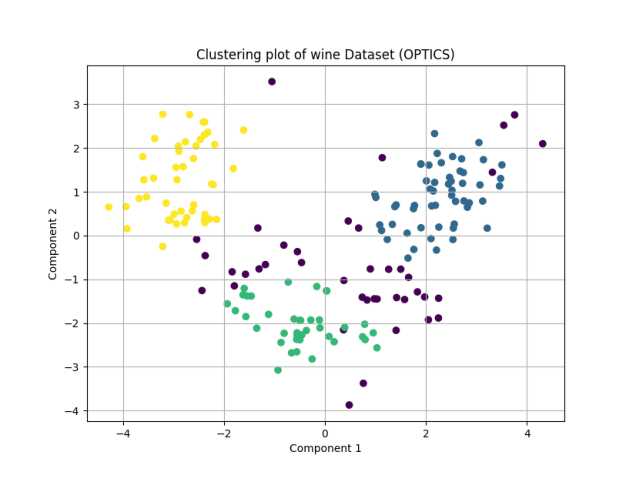

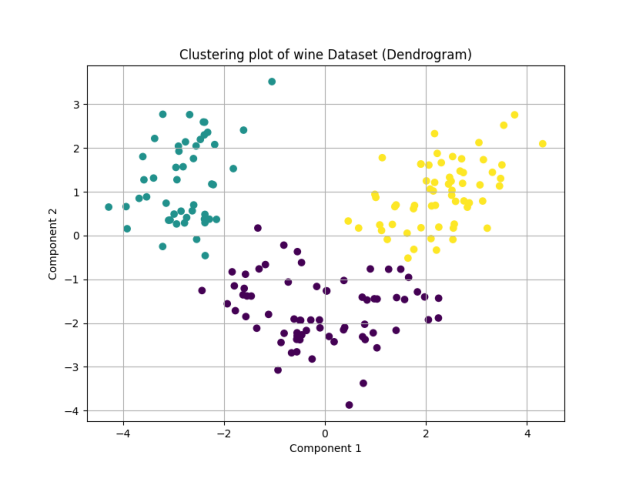

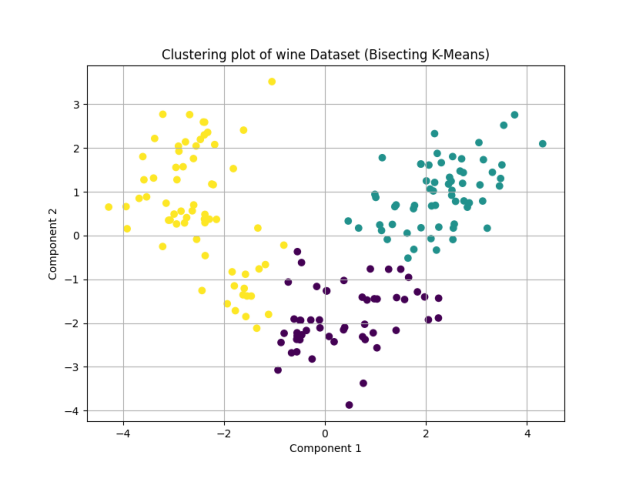

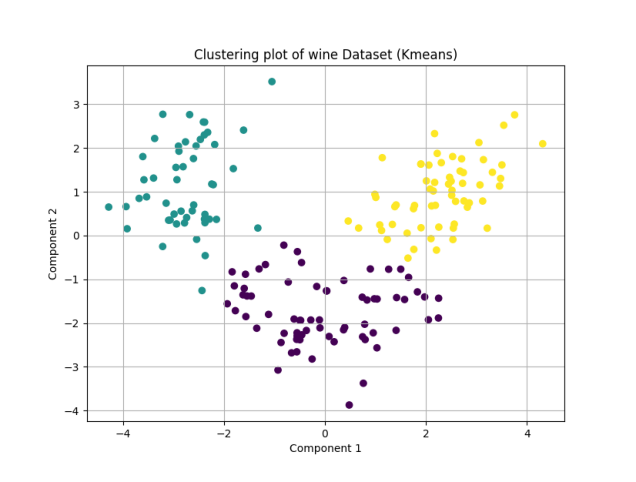

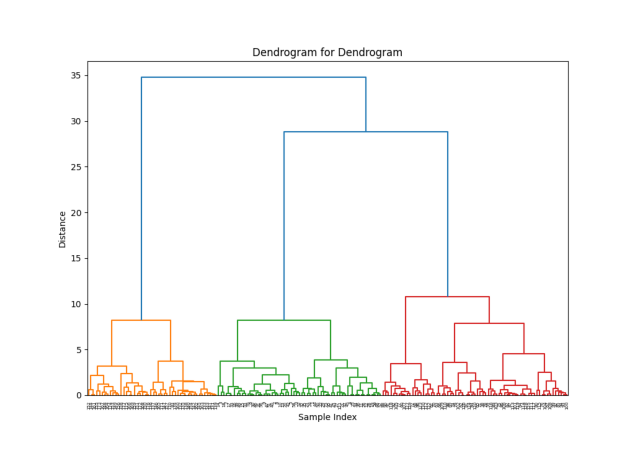

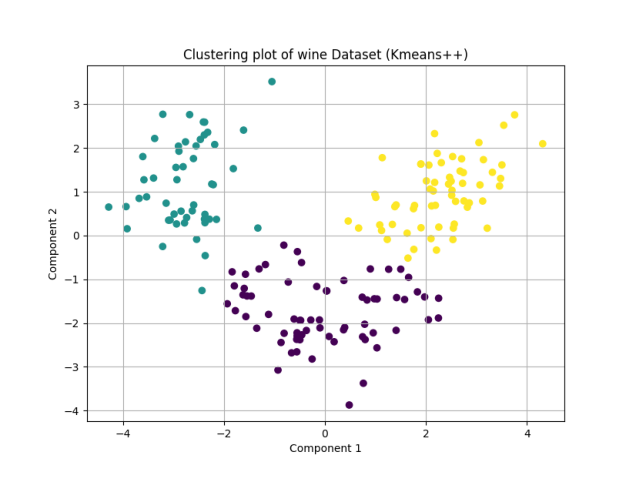

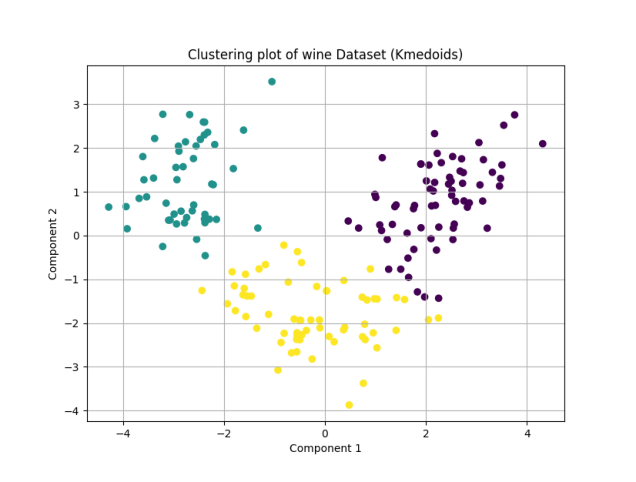

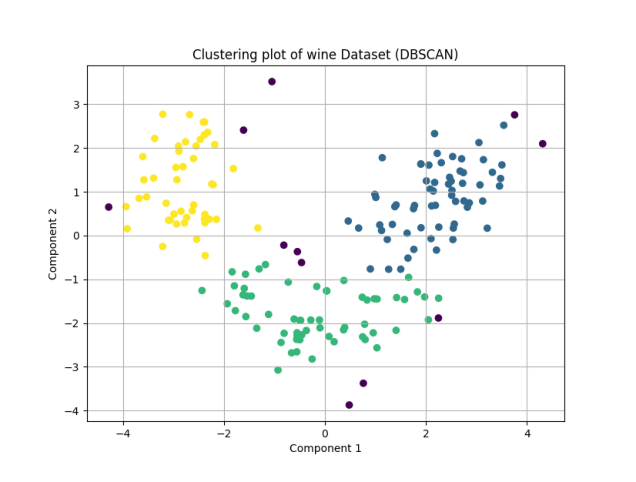

In [31]:
plot_plots('wine', 'plots')

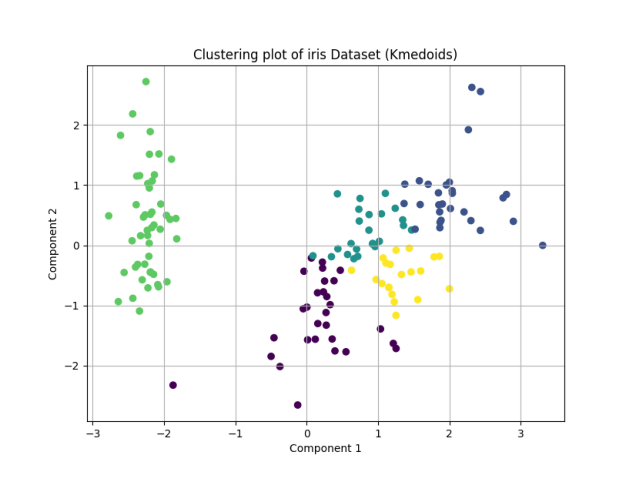

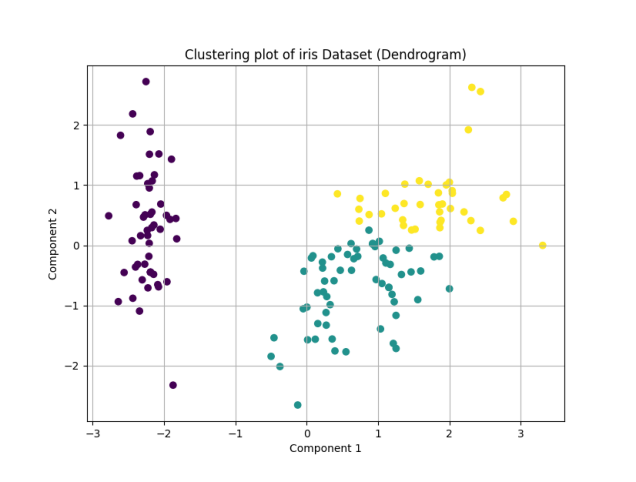

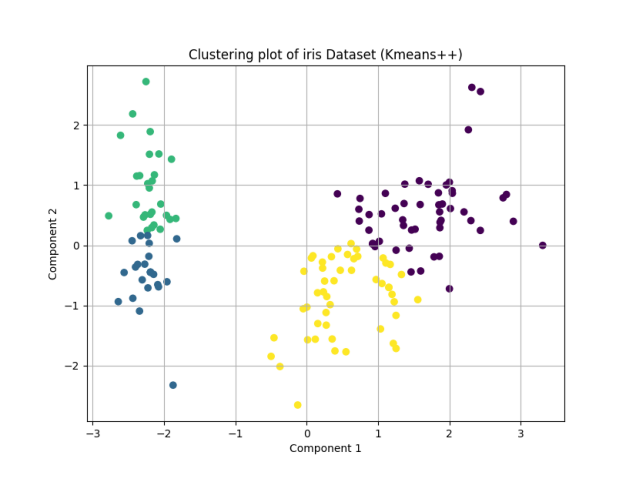

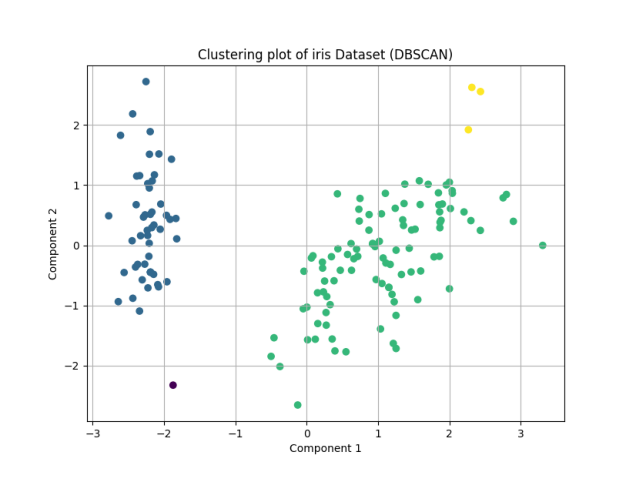

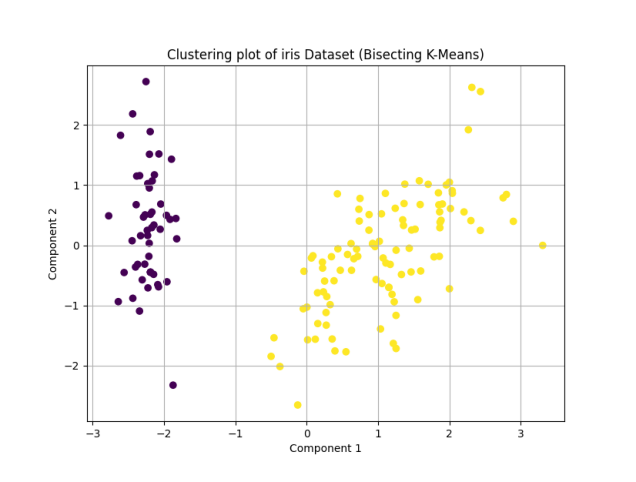

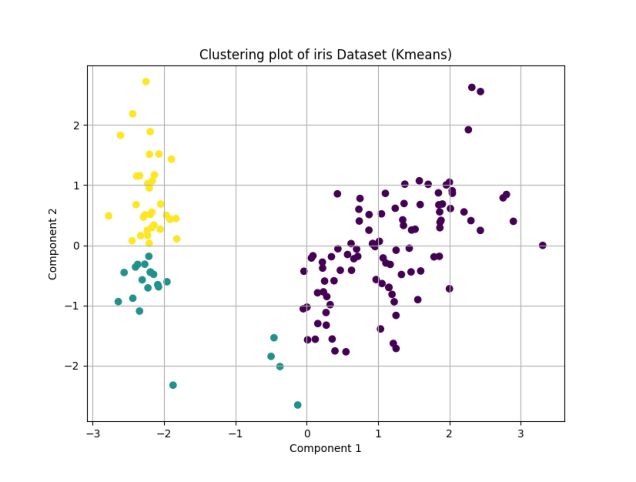

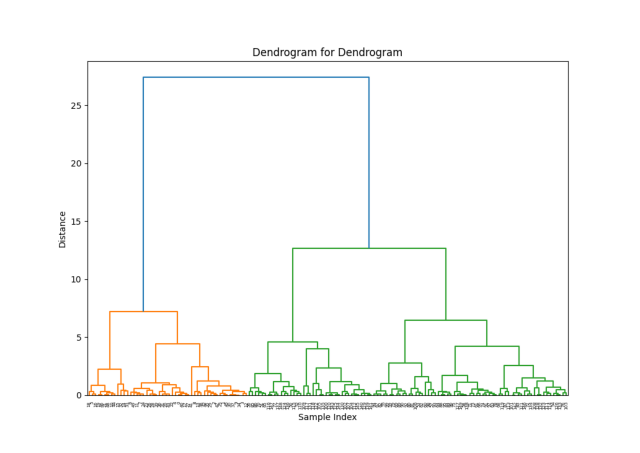

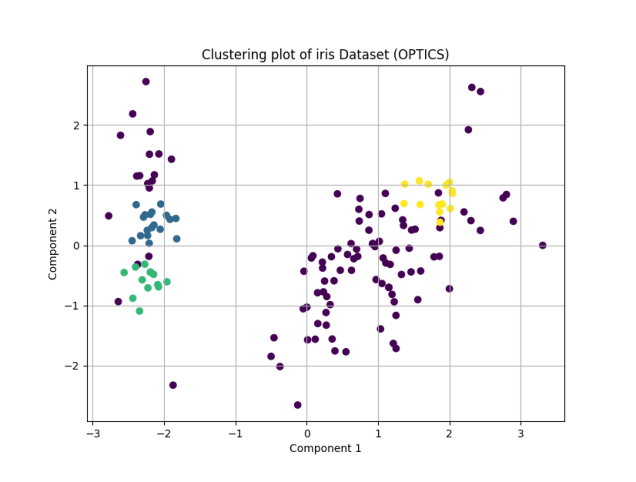

In [32]:
plot_plots('iris', 'plots')